# Limpieza de datos de la encuesta

## Cargamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import unidecode
import missingno as msno
from scipy.stats import chi2_contingency
import utils


## Cargamos los datos

* Carga de datos originales
* Cambio de nombre de las variables según diccionario

In [2]:
__path__ = '/Users/iairlinker/Documents/repos/taller_ahh1/data/raw/'
# Load the encuesta DataFrame
encuesta = pd.read_csv(__path__ + 'encuesta.csv')
encuesta.columns


Index(['Marca temporal', 'Dirección de correo electrónico', 'Nombres',
       'Apellidos', 'Fecha de nacimiento', '¿Qué tanto te gusta estudiar?',
       '¿Cuántas horas te dedicarías en una semana a estudiar para una asignatura si no tuvieras una evaluación pronto?',
       '¿Cuánto tiempo dedicas en una semana a estudiar para una asignatura en la que pronto tendrás una evaluación?',
       'Si sientes que estás preparad(a/o) para una evaluación ¿Dedicarías horas a estudiar de todas formas?',
       'Cuando estudias algo relacionado con Matemática...¿Cuántos ejercicios resuelves en una sesión de estudio?',
       '¿Cuál o cuáles de los siguientes métodos utilizas para estudiar?',
       '¿En qué horario prefieres estudiar?',
       '¿Qué lugar(es) utilizas para estudiar?',
       '¿Qué factores consideras que dificultan tus estudios?',
       '¿Sientes que tienes tiempo suficiente para estudiar?',
       '¿Cuántas horas dedicas diariamente a dormir?',
       '¿Cuántas horas dedicas di

In [3]:
# Load the JSON file
with open(__path__ + 'diccionario_nombre_variables.json', 'r') as file:
    diccionario = json.load(file)

# Extract the mapping (preguntas -> P codes)
preguntas_mapping = {v['pregunta']: k for k, v in diccionario.items()}
# Rename columns
encuesta.rename(columns=preguntas_mapping, inplace=True)
encuesta.head(3).T

,0,1,2
P0,9/12/2024 9:53:35,9/12/2024 10:10:46,9/12/2024 10:12:27
P1,isidorahuaiquilaf402@gmail.com,valentina.adm.ite@gmail.com,aljaque@alumnos.uahurtado.cl
P2,Isidora Esperanza,Valentina del carmen,Alexis Alexander
P3,Huaiquilaf Verdugo,Silva ite,Jaque Cardenas
P4,3/10/2004,13/07/2005,30/06/2006
P5,2,3,4
P6,Entre una y dos horas,Entre una y dos horas,Estudiaría hasta que sienta que estoy preparad...
P7,Estudio hasta que siento que estoy preparad(a/...,Entre una y dos horas,Entre 4 y 7 horas
P8,Definitivamente sí,Tal vez,Definitivamente sí
P9,Todos los necesarios (hasta que siento que est...,Ninguno. Solo reviso el material,Todos los necesarios (hasta que siento que est...


In [4]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P0      80 non-null     object
 1   P1      80 non-null     object
 2   P2      80 non-null     object
 3   P3      80 non-null     object
 4   P4      80 non-null     object
 5   P5      80 non-null     int64 
 6   P6      80 non-null     object
 7   P7      80 non-null     object
 8   P8      80 non-null     object
 9   P9      80 non-null     object
 10  P10     80 non-null     object
 11  P11     80 non-null     object
 12  P12     80 non-null     object
 13  P13     80 non-null     object
 14  P14     80 non-null     int64 
 15  P15     80 non-null     object
 16  P16     80 non-null     object
 17  P17     78 non-null     object
 18  P18     79 non-null     object
 19  P19     77 non-null     object
 20  P20     80 non-null     object
 21  P21     37 non-null     object
dtypes: int64(2), object(20)
memo

## Valores NA

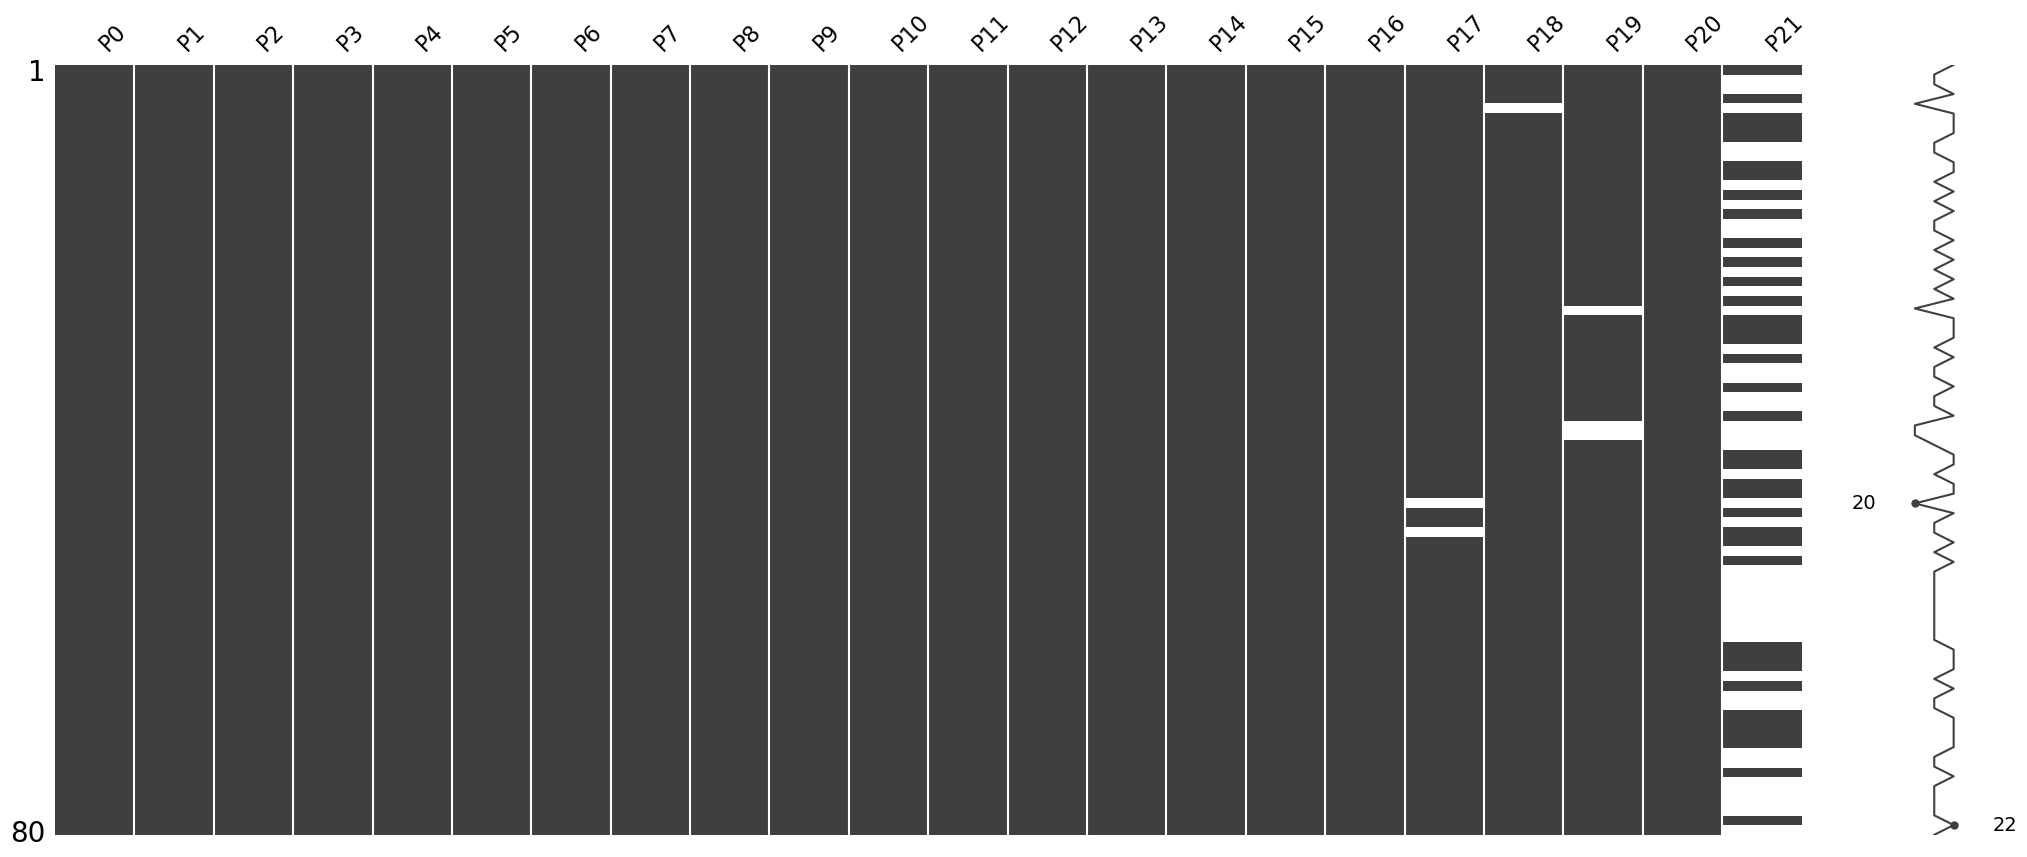

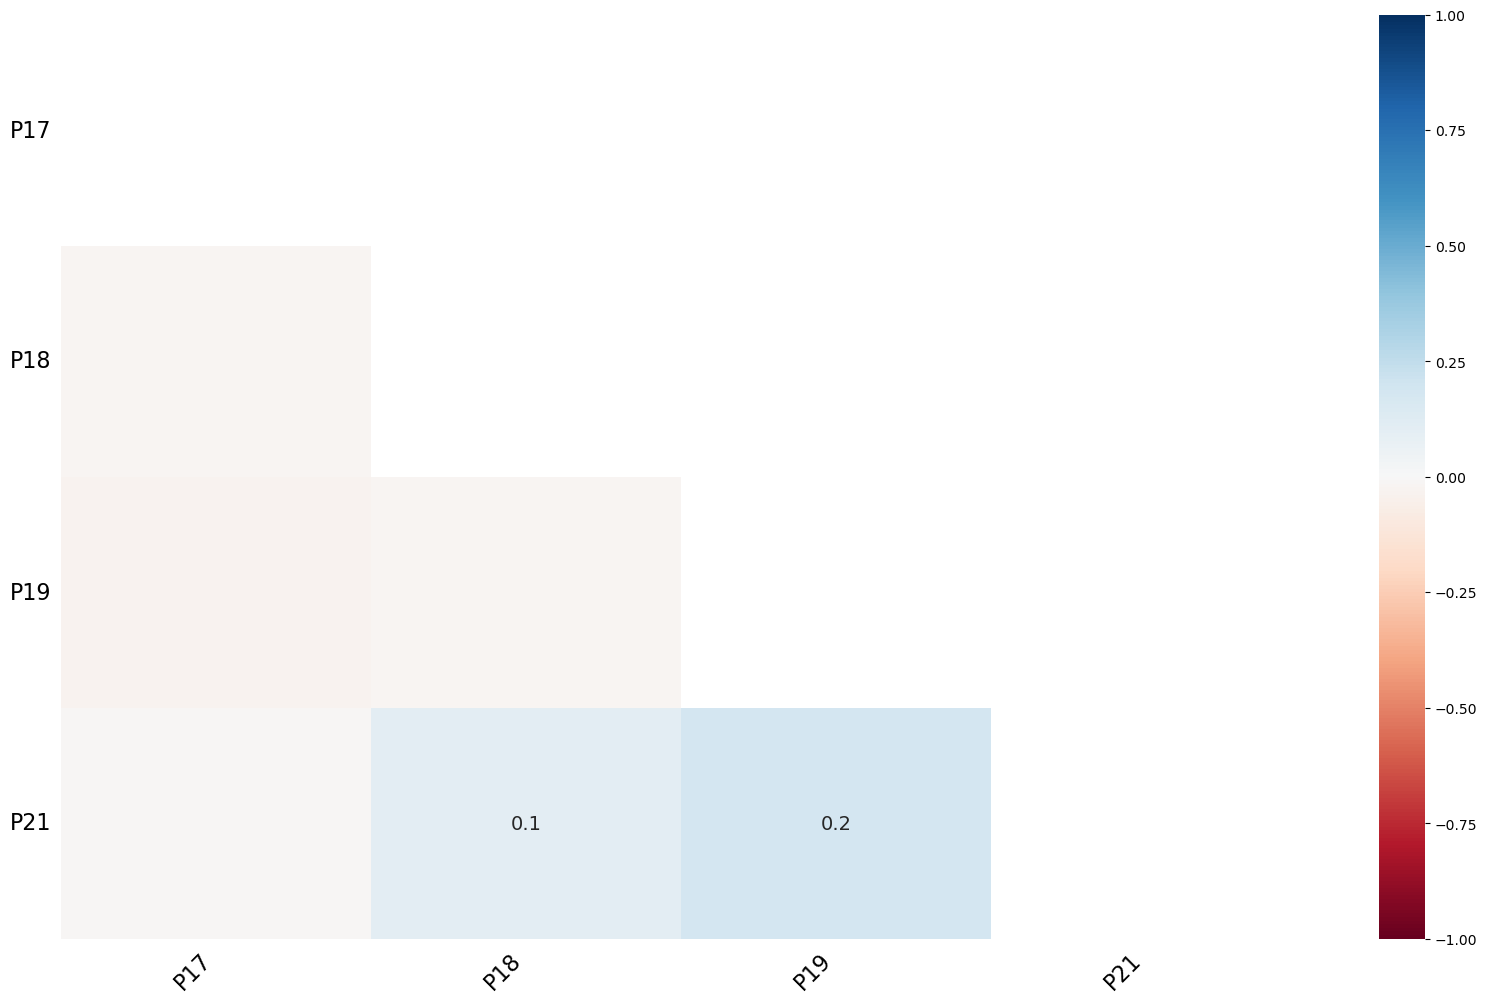

In [5]:
# Visualizar los datos faltantes
msno.matrix(encuesta)
plt.show()
# Visualizar correlaciones entre datos faltantes
msno.heatmap(encuesta)
plt.show()

In [6]:
# Example usage with your DataFrame `encuesta`
utils.test_missing_mcar(encuesta)

Chi2 Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies: [36. 38.  3.  1.  1.  1.]
Result: Cannot reject the null hypothesis. The missing data is MCAR.


## Homologación de valores

### Homologación de valores en la variable target

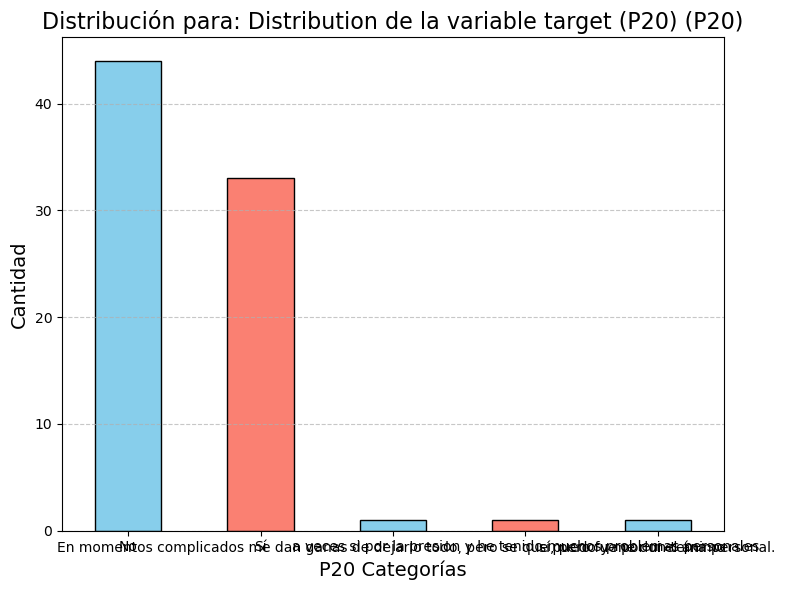

In [7]:
# Call the function with P5 as an example
utils.plot_distribution(
    df=encuesta, 
    variable_name='P20', 
    question_text='Distribution de la variable target (P20)'
)

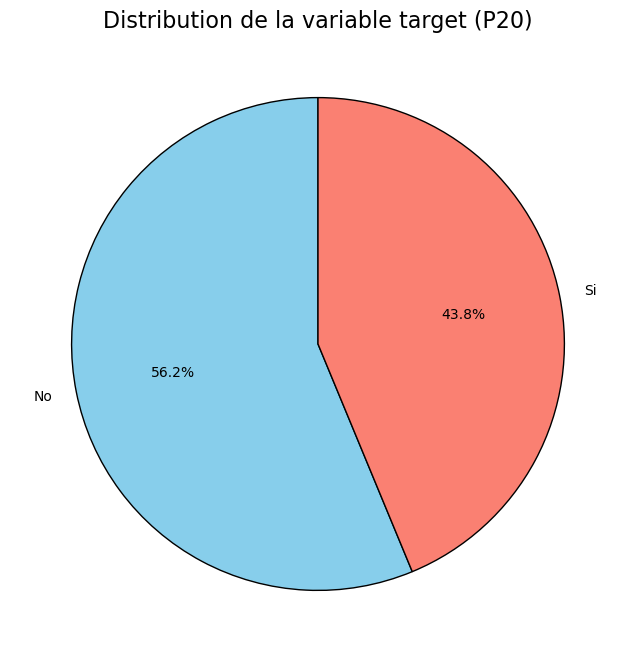

In [8]:
# Normalize and transform P20
def transform_p20(response):
    # Normalize the text (lowercase, remove accents)
    normalized_response = unidecode.unidecode(str(response).strip().lower())
    
    # Return directly if already "sí" or "no"
    if normalized_response in ['si', 'no']:
        return normalized_response.capitalize()
    
    # Check for the presence of "si"
    if 'si' in normalized_response:
        return "Si"
    else:
        return "No"
    
# Apply transformation to P20
encuesta['P20'] = encuesta['P20'].apply(transform_p20)
# Calculate the value counts and percentages
target_counts = encuesta['P20'].value_counts(normalize=True) * 100
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution de la variable target (P20)', fontsize=16)
plt.show()

### Calcular la fecha de nacimiento

## Distribución para la pregunta: ¿Qué tanto te gusta estudiar? (P5)

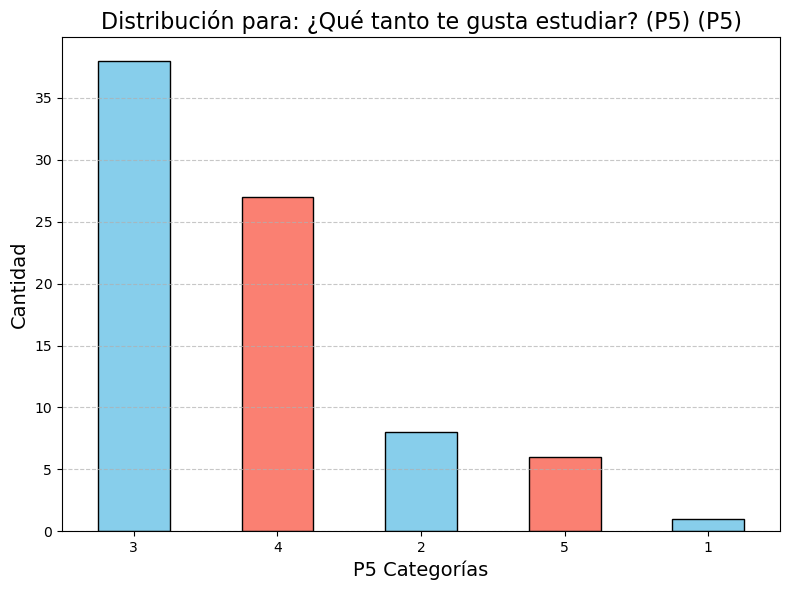

In [9]:
# Assuming the columns are already renamed, and P20 is your target variable
# Calculate the value counts
target_counts = encuesta['P5'].value_counts()

# Call the function with P5 as an example
utils.plot_distribution(
    df=encuesta, 
    variable_name='P5', 
    question_text='¿Qué tanto te gusta estudiar? (P5)'
)